In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

In [14]:
img_size = 224

In [15]:
path1 = 'D:/study/ml/New folder/all training'
path = 'D:/study/ml/New folder/all training'
# path1 = 'D:/study/ml/New folder/train_black'


In [16]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
                rotation_range=10,
                # width_shift_range=0.15,
                # height_shift_range=0.15,
                # shear_range=0.15,
                horizontal_flip=True)

In [17]:
# x = gray_three.reshape((1,) + gray_three.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in image_generator.flow(x, batch_size=1,
#                           save_to_dir='D:/IIT MANDI/3rd Sem/IC 272/Project/DataAugment_imgs', save_prefix='eye', save_format='jpeg'):
#     i += 1
#     if i > 10:
#         break 

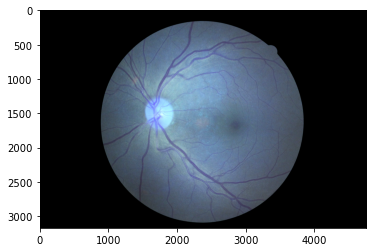

(3168, 4752, 3)


In [18]:
# path1 = 'D:/IIT MANDI/3rd Sem/IC 272/Project/DataAugment_imgs'
for i in os.listdir(path):
    bgr_img1 = cv2.imread(os.path.join(path1,i))
    plt.imshow(bgr_img1)
    plt.show()
    print(bgr_img1.shape)
    break

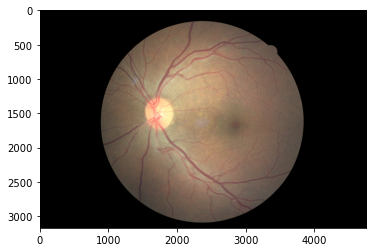

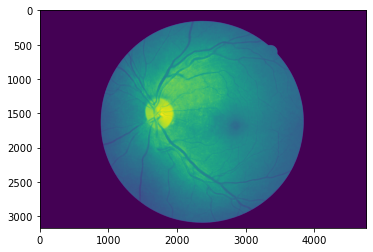

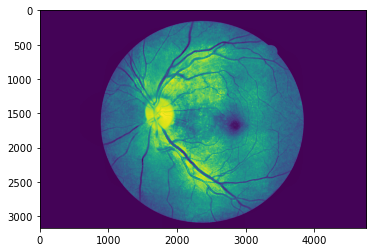

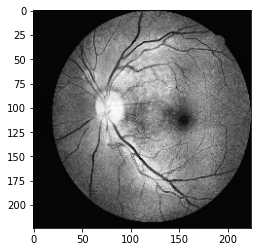

In [19]:
# path = "D:/IIT MANDI/3rd Sem/IC 272/Project/EyeImages" 
count = 0
for img in (os.listdir(path1)):
    
    bgr_img = cv2.imread(os.path.join(path1,img))
    
    image_bw = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    # hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    rbg_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rbg_img)
    plt.show()
    plt.imshow(image_bw)
    plt.show()
    # gray_three = cv2.merge([image_bw,image_bw,image_bw])
    # hsv_img = cv2.cvtColor(rbg_img, cv2.COLOR_BGR2HSV)

    clahe = cv2.createCLAHE(clipLimit = 5)
    final_img = clahe.apply(image_bw)

    # plt.imshow(final_img)
    # plt.show()
    
    #finding ends for croping
    plt.imshow(final_img)
    plt.show()
    img_processed = (np.array(final_img)-6)/255
      
    variance=1
    col_sum = np.sum(img_processed, axis=0)
    row_sum = np.sum(img_processed, axis=1)
    coordx = []
    coordy = []
    for i,j in enumerate(col_sum):
        if j>variance:
            coordx.append(i)
    for i,j in enumerate(row_sum):
        if j>variance:
            coordy.append(i)
    

    final_img = final_img[coordy[0]:coordy[-1]:, coordx[0]:coordx[-1]]
    
    gray_three = cv2.merge([final_img,final_img,final_img])
    gray_three = cv2.resize(gray_three, (img_size,img_size))
    plt.imshow(gray_three)
    plt.show()
    break
    
    # count+=1
    # if count ==10:
    #     break

In [20]:
# from keras.preprocessing.image import ImageDataGenerator

# image_generator = ImageDataGenerator(
#                 rotation_range=30,
#                 width_shift_range=0.15,
#                 height_shift_range=0.15,
#                 shear_range=0.15,
#                 horizontal_flip=True,
#                 fill_mode='nearest')

# print(gray_three.shape)



In [21]:
# x = gray_three.reshape((1,) + gray_three.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in image_generator.flow(x, batch_size=1,
#                           save_to_dir='D:/IIT MANDI/3rd Sem/IC 272/Project/DataAugment_imgs', save_prefix='eye', save_format='jpeg'):
#     i += 1
#     if i > 10:
#         break  # otherwise the generator would loop indefinitely

In [22]:
# path1 = 'D:/IIT MANDI/3rd Sem/IC 272/Project/DataAugment_imgs'
# for i in os.listdir(path1):
#     bgr_img1 = cv2.imread(os.path.join(path1,i))
#     plt.imshow(bgr_img1)
#     plt.show()
#     print(bgr_img1.shape)